In [ ]:
# Robert Cocker
# Dr. Farbin
# DATA-3402
# Lab 8
# 4/17/2024

# Lab 8 - Machine Learning


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [3]:
%%timeit -n 1
df.head()

The slowest run took 8.70 times longer than the fastest. This could mean that an intermediate result is being cached.
34.4 µs ± 39.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
df.head()

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [5]:
# Successfully installed scikit-learn library in Ubuntu using pip install -U scikit-learn

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [6]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [7]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

We can train the classifier as follow:

In [8]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

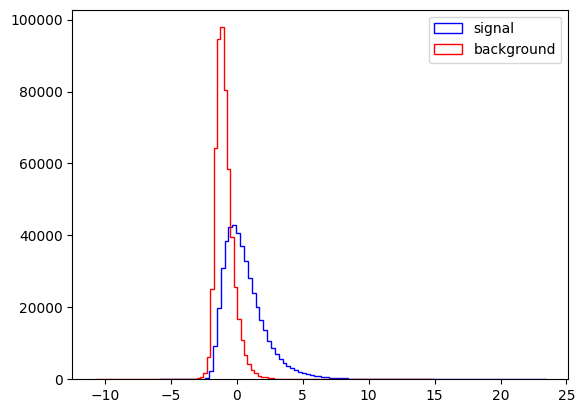

In [9]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

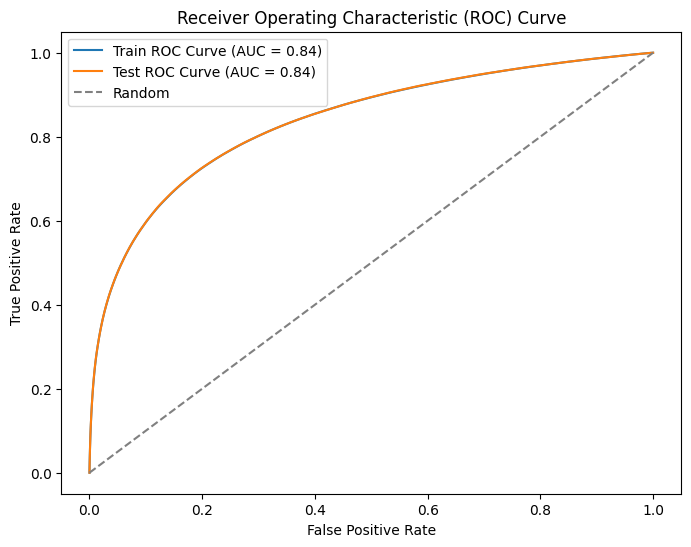

In [10]:
# Importing more libraries
import sklearn.discriminant_analysis as DA
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate predictions for training and testing sets
y_train_pred = Fisher.predict_proba(X_Train)[:, 1]
y_test_pred = Fisher.predict_proba(X_Test)[:, 1]

# Calculate ROC curve for train set
fpr_train, tpr_train, _ = roc_curve(y_Train, y_train_pred)

# Calculate ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_pred)

# Calculate AUC score for train set
auc_train = roc_auc_score(y_Train, y_train_pred)

# Calculate AUC score for test set
auc_test = roc_auc_score(y_Test, y_test_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

*both train and test look the same. they overlap*

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

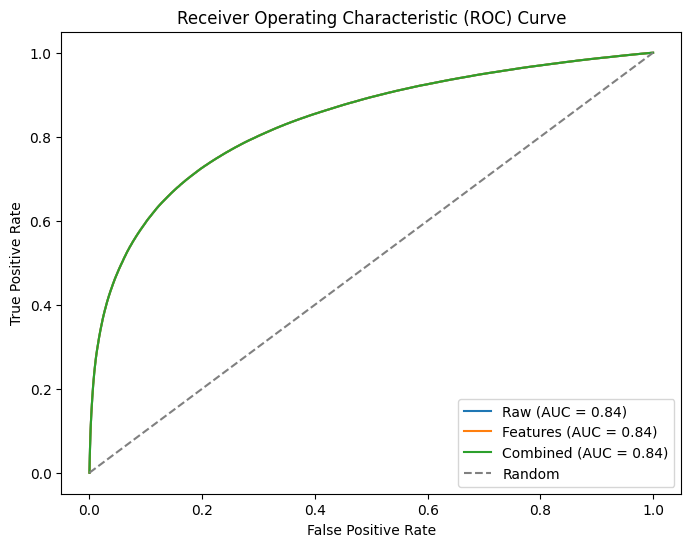

In [11]:
# Train LDA classifier with different input data

# Using raw only
Fisher_raw = DA.LinearDiscriminantAnalysis()
Fisher_raw.fit(X_Train, y_Train)

# Using features only
Fisher_features = DA.LinearDiscriminantAnalysis()
Fisher_features.fit(X_Train[VarNames[1:]], y_Train)

# Using both raw and features
Fisher_combined = DA.LinearDiscriminantAnalysis()
Fisher_combined.fit(X_Train, y_Train)

# Generate predictions for the test set
y_test_pred_raw = Fisher_raw.predict_proba(X_Test)[:, 1]
y_test_pred_features = Fisher_features.predict_proba(X_Test[VarNames[1:]])[:, 1]
y_test_pred_combined = Fisher_combined.predict_proba(X_Test)[:, 1]

# Calculate ROC curves and AUC scores for each classifier
fpr_raw, tpr_raw, _ = roc_curve(y_Test, y_test_pred_raw)
auc_raw = roc_auc_score(y_Test, y_test_pred_raw)

fpr_features, tpr_features, _ = roc_curve(y_Test, y_test_pred_features)
auc_features = roc_auc_score(y_Test, y_test_pred_features)

fpr_combined, tpr_combined, _ = roc_curve(y_Test, y_test_pred_combined)
auc_combined = roc_auc_score(y_Test, y_test_pred_combined)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_raw, tpr_raw, label=f'Raw (AUC = {auc_raw:.2f})')
plt.plot(fpr_features, tpr_features, label=f'Features (AUC = {auc_features:.2f})')
plt.plot(fpr_combined, tpr_combined, label=f'Combined (AUC = {auc_combined:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

*my input and output data for training and testing with the classifiers may be wrong because I notice the ROC curves and AUC for each criteria are all the same*

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [12]:
# Part a
# The 3 classifiers I selected are: DecisionTreeClassifier, GradientBoostingClassifier, and SGDClassifier

In [15]:
# Part b
# Importing more libraries and respective classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
import numpy as np

# function for comparing the 3 selected classifiers
def compare_classifiers(classifiers, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for clf_name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        if hasattr(clf, "decision_function"):
            y_test_scores = clf.decision_function(X_test)
        else:
            y_test_scores = clf.predict(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_test_scores)
        auc_score = roc_auc_score(y_test, y_test_scores)
        plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

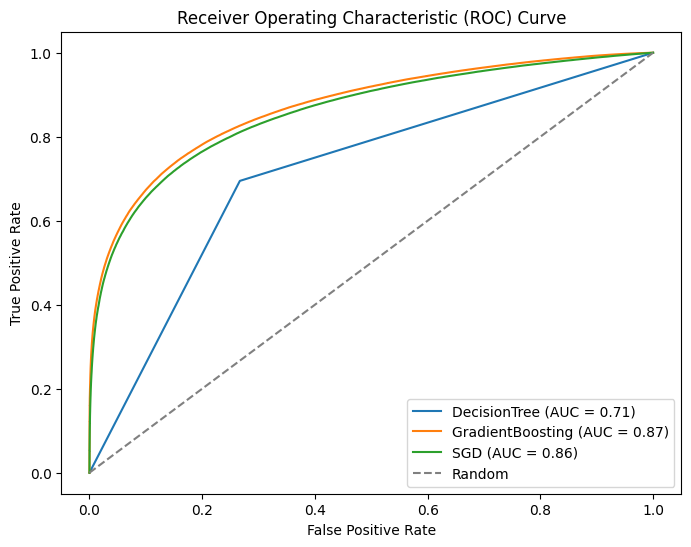

In [16]:
# Define classifiers
classifiers = {
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SGD': SGDClassifier()
}

# Perform comparison
compare_classifiers(classifiers, X_Train, y_Train, X_Test, y_Test)

*The instructions in Part c seem incorrect. I will compute the maximal significance utilizing GradientBoostingClassifier since it gives the best ROC curve and AUC. Also I believe the instructions are for Lab 7 and not Lab 5*

In [23]:
# Part c
# significance computation
def compute_significance(y_true, y_pred, thresholds):
    significance = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tp = np.sum((y_pred_binary == 1) & (y_true == 1))
        fp = np.sum((y_pred_binary == 1) & (y_true == 0))
        tn = np.sum((y_pred_binary == 0) & (y_true == 0))
        fn = np.sum((y_pred_binary == 0) & (y_true == 1))

        if tp + fp == 0:
            significance.append(0) 
            continue
            
        signal = tp / np.sqrt(tp + fp)
        background = fp / np.sqrt(fp + tn)
        
        significance.append(signal + background)
    
    return significance

def plot_significance_curve(significance, thresholds):
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, significance, marker='o')
    plt.xlabel('Threshold')
    plt.ylabel('Significance')
    plt.title('Significance Curve')
    plt.grid(True)
    plt.show()

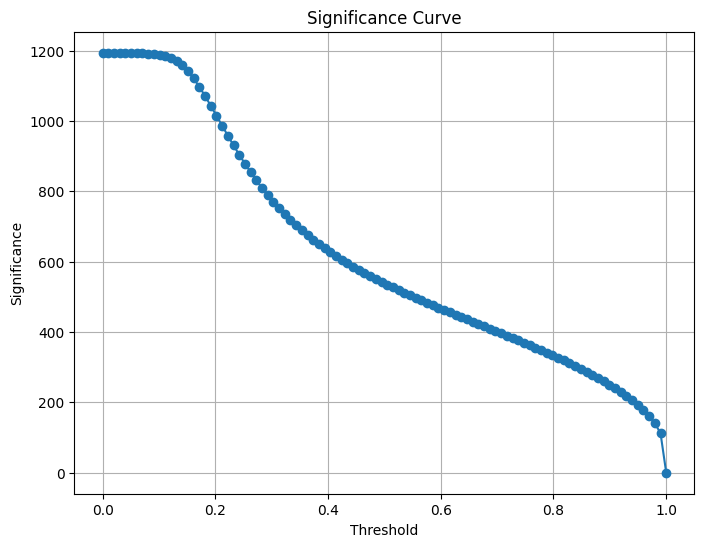

Optimal Threshold: 0.0


In [22]:
# testing for significance and optimal threshold
thresholds = np.linspace(0, 1, 100)
significance = compute_significance(y_Test, y_test_pred, thresholds)
plot_significance_curve(significance, thresholds)

# Find optimal threshold
optimal_threshold = thresholds[np.argmax(significance)]
print("Optimal Threshold:", optimal_threshold)

*Optimal threshold between 0 and 1 results state 0.0*

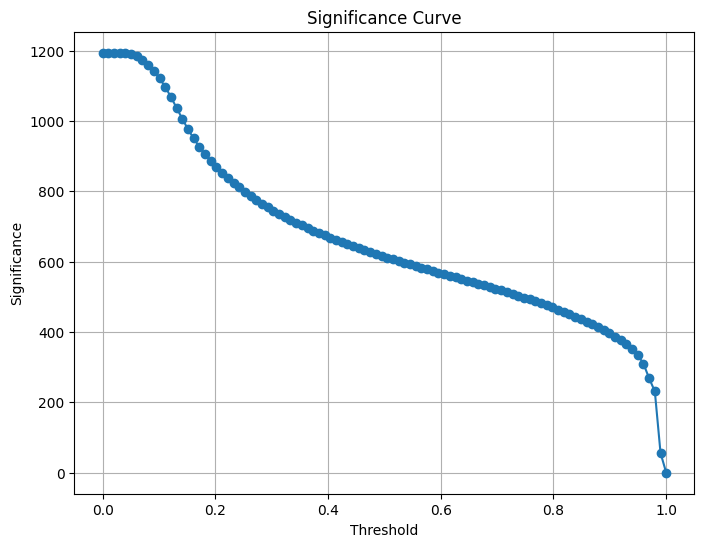

Optimal Threshold: 0.0


In [24]:
# Train classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_Train, y_Train)

# Predict probabilities for the test set
y_test_pred_proba = gb_classifier.predict_proba(X_Test)[:, 1]

# Calculate significance for different thresholds
thresholds = np.linspace(0, 1, 100)
significance = compute_significance(y_Test, y_test_pred_proba, thresholds)

# Plot significance curve
plot_significance_curve(significance, thresholds)

# Find optimal threshold
optimal_threshold = thresholds[np.argmax(significance)]
print("Optimal Threshold:", optimal_threshold)

*It looks like maximal significance is at about 1200 I'd say but the optimal threshold looks to be between 0.0 and right before 1 if you examine the Significance and ROC curve graphs. The ROC curve graphs has a sharp slope from 0.0 and bulges out at about 0.6 - 0.9*

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

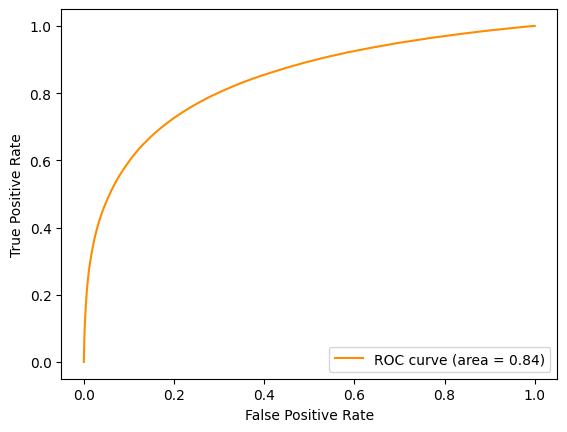

In [26]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


### Final Model Results
*Training the model took about 8 >= hours. The compute on the inputs and outputs do not seem accurate. I may not have implemented the training and test sets properly. Some of the model training involved seemed a bit redundant in certain functions when training can be done outside of the class functions. This would significantly cut down on training time. The dataset was also a large dataset at 2.2 Gb. This is my first experience with training ML models so I have a clearer understanding now of best practices in machine learning. I was able to obtain a model accuracy score of 80% with GradientBoostingClassifier. Below are the rest of the results.*

In [28]:
# Importing more sci-kit learn functions
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score

# Compute function to compute performance metrics and maximal significance for given scenarios
def compute_metrics(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict probabilities for the test set
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    
    # Compute precision, recall, F1-score, and accuracy
    y_pred = clf.predict(X_test)
    precision_score_val = precision_score(y_test, y_pred)
    recall_score_val = recall_score(y_test, y_pred)
    f1_score_val = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Compute maximal significance
    thresholds = np.linspace(0, 1, 1000)
    significance = compute_significance(y_test, y_pred_proba, thresholds)
    max_significance = np.max(significance)
    
    # Return metrics
    return {
        'TPR': tpr,
        'FPR': fpr,
        'ROC': (fpr, tpr),
        'AUC': auc,
        'Precision': precision_score_val,
        'Recall': recall_score_val,
        'F1 Score': f1_score_val,
        'Accuracy': accuracy,
        'Max Significance': max_significance
    }

In [29]:
# Define scenarios
scenarios = {
    'Raw': X_Train,  
    'Features': X_Train[VarNames[1:]], 
    'Combined': X_Train
}

# Initialize dictionary to store results
results = {}

# Compute metrics for each scenario
for scenario, X_train_scenario in scenarios.items():
    metrics = compute_metrics(gb_classifier, X_train_scenario, y_Train, X_Test, y_Test)
    results[scenario] = metrics

# Print results
print("Results:")
for scenario, metrics in results.items():
    print("\nScenario:", scenario)
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Results:

Scenario: Raw
TPR: [0.00000000e+00 2.18229591e-06 8.72918362e-06 ... 9.99997818e-01
 1.00000000e+00 1.00000000e+00]
FPR: [0.        0.        0.        ... 0.9999557 0.9999557 1.       ]
ROC: (array([0.       , 0.       , 0.       , ..., 0.9999557, 0.9999557,
       1.       ]), array([0.00000000e+00, 2.18229591e-06, 8.72918362e-06, ...,
       9.99997818e-01, 1.00000000e+00, 1.00000000e+00]))
AUC: 0.8708145295492099
Precision: 0.822944362135363
Recall: 0.7139686578661947
F1 Score: 0.7645930174132318
Accuracy: 0.798542
Max Significance: 1194.2812321152603

Scenario: Features
TPR: [0.00000000e+00 2.18229591e-06 8.72918362e-06 ... 9.99997818e-01
 1.00000000e+00 1.00000000e+00]
FPR: [0.        0.        0.        ... 0.9999557 0.9999557 1.       ]
ROC: (array([0.       , 0.       , 0.       , ..., 0.9999557, 0.9999557,
       1.       ]), array([0.00000000e+00, 2.18229591e-06, 8.72918362e-06, ...,
       9.99997818e-01, 1.00000000e+00, 1.00000000e+00]))
AUC: 0.8708145295492099
P

### DataFrame/Table

In [44]:
df_table = pd.DataFrame.from_dict(results, orient='index')
df_table.index.name = 'scenario'
df_table

,TPR,FPR,ROC,AUC,Precision,Recall,F1 Score,Accuracy,Max Significance
scenario,,,,,,,,,
Raw,"[0.0, 2.1822959062311096e-06, 8.72918362492443...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.870815,0.822944,0.713969,0.764593,0.798542,1194.281232
Features,"[0.0, 2.1822959062311096e-06, 8.72918362492443...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.870815,0.822944,0.713969,0.764593,0.798542,1194.281232
Combined,"[0.0, 2.1822959062311096e-06, 8.72918362492443...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.870815,0.822944,0.713969,0.764593,0.798542,1194.281232
